In [1]:
# Install dependencies
!pip install chandra-ocr transformers torch pillow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.7/87.7 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.9/67.9 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.4/106.4 kB 9.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 33.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 462.4/462.4 kB 38.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 78.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 92.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 101.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 99.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.5/40.5 MB 16.8 MB/s eta 0:00:00
  Attempting uninstall: pydantic-core
    Found existing installation: pydantic_core 2.33.2
    Uninstalling pydantic_core-2.33.2:
      Successfully uninstalled pydantic_core-2.33.2
  Attempting uninstall: beaut

In [2]:
# Import libraries
import re
from PIL import Image
from transformers import pipeline
from IPython.display import display
from chandra.model import InferenceManager
from chandra.model.schema import BatchInputItem
from transformers import BartTokenizer, BartForConditionalGeneration

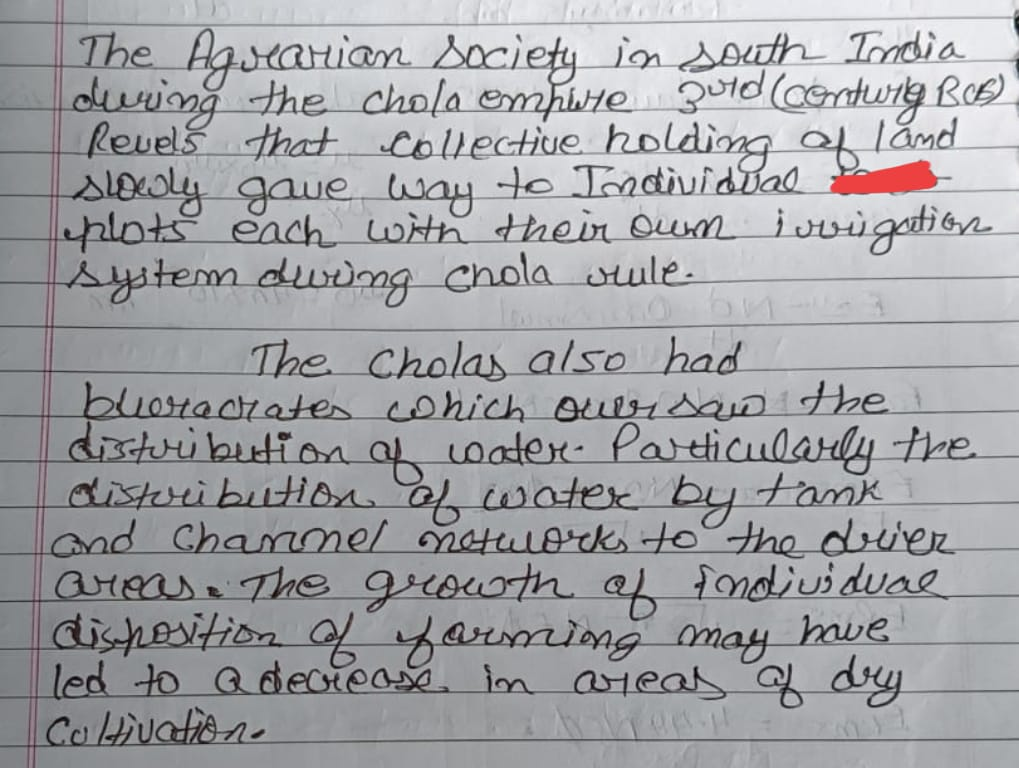

In [3]:
# Load image
image_path = "/content/WhatsApp Image 2025-11-04 at 18.19.36.jpeg"
image = Image.open(image_path).convert("RGB")
display(image)

In [4]:
# Use Chandra to do OCR/layout extraction
manager = InferenceManager(method="hf")
batch_item = BatchInputItem(image=image, prompt_type="ocr_layout")
result = manager.generate([batch_item])[0]

ocr_markdown = result.markdown

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json: 0.00B [00:00, ?B/s]

model.safetensors.index.json: 0.00B [00:00, ?B/s]

Fetching 4 files:   0%|          | 0/4 [00:00<?, ?it/s]

model-00003-of-00004.safetensors:   0%|          | 0.00/4.92G [00:00<?, ?B/s]

model-00004-of-00004.safetensors:   0%|          | 0.00/2.70G [00:00<?, ?B/s]

model-00001-of-00004.safetensors:   0%|          | 0.00/5.00G [00:00<?, ?B/s]

model-00002-of-00004.safetensors:   0%|          | 0.00/4.92G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/4 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/213 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/782 [00:00<?, ?B/s]

tokenizer_config.json: 0.00B [00:00, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer.json:   0%|          | 0.00/11.4M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/707 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/613 [00:00<?, ?B/s]

chat_template.jinja: 0.00B [00:00, ?B/s]

video_preprocessor_config.json:   0%|          | 0.00/817 [00:00<?, ?B/s]

In [5]:
# Clean the extracted text (strip markdown/tags if needed)
ocr_text = re.sub(r'<[^>]+>', '', ocr_markdown)
ocr_text_clean = re.sub(r'[\n\f]+', ' ', ocr_text).strip()

print("📝 OCR Output:\n", ocr_text_clean)

📝 OCR Output:
 The Agrarian Society in South India during the Chola Empire 3rd (century BCE) reveals that collective holding of land slowly gave way to individual plots each with their own irrigation system during Chola rule. The Cholas also had bureaucrats which oversaw the distribution of water. Particularly the distribution of water by tank and channel networks to the drier areas. The growth of individual disposition of farming may have led to a decrease in areas of dry cultivation.


In [6]:
# Tokenize the input text and count the number of tokens
# This helps to set max_length dynamically for the summarization model
tokenizer = BartTokenizer.from_pretrained("facebook/bart-large-xsum")

# Tokenize input
input_tokens = tokenizer.encode(ocr_text_clean, return_tensors="pt")
num_input_tokens = input_tokens.shape[1]
print("Number of input tokens:", num_input_tokens)

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

config.json: 0.00B [00:00, ?B/s]

Number of input tokens: 92


In [7]:
# Summarization pipeline (on CPU)
summarizer = pipeline("summarization", model="facebook/bart-large-xsum", device=-1)
# Summarize
summary = summarizer(ocr_text_clean, max_length=num_input_tokens, min_length=20, do_sample=False)[0]['summary_text']

print("\n🔍 Summary:\n", summary)

pytorch_model.bin:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/309 [00:00<?, ?B/s]

Device set to use cpu



🔍 Summary:
 The growth of individual farming may have led to a decrease in the number of dry areas in South India.


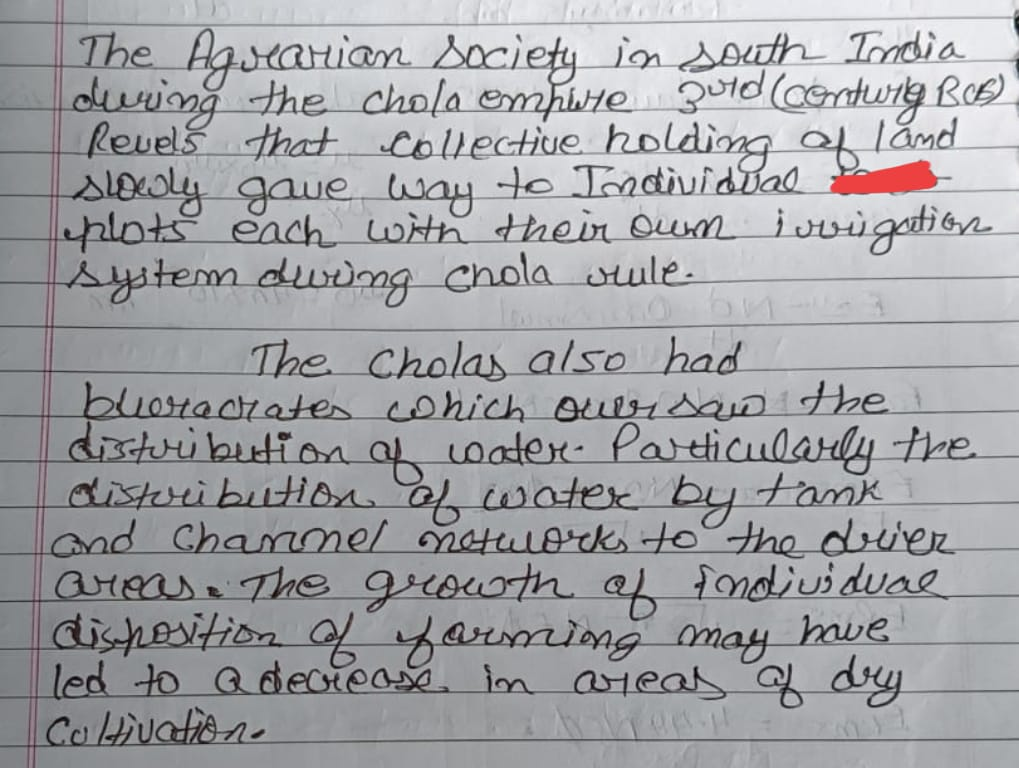


📝 OCR Output:
 The Agrarian Society in South India during the Chola Empire 3rd (century BCE) reveals that collective holding of land slowly gave way to individual plots each with their own irrigation system during Chola rule. The Cholas also had bureaucrats which oversaw the distribution of water. Particularly the distribution of water by tank and channel networks to the drier areas. The growth of individual disposition of farming may have led to a decrease in areas of dry cultivation.

🔍 Summary:
 The growth of individual farming may have led to a decrease in the number of dry areas in South India.


In [8]:
# Display result
display(image)
print("\n📝 OCR Output:\n", ocr_text_clean)
print("\n🔍 Summary:\n", summary)